In [3]:
# Dependencies
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as st
import numpy as np

In [4]:
# Read in the CMPD data
crimeDF = pd.read_csv('CMPD_Incidents.csv', low_memory=False)
crimeDF.head()

,YEAR,INCIDENT_REPORT_ID,LOCATION,ZIP,X_COORD_PUBLIC,Y_COORD_PUBLIC,LATITUDE_PUBLIC,LONGITUDE_PUBLIC,CMPD_PATROL_DIVISION,NPA,...,DATE_INCIDENT_END,ADDRESS_DESCRIPTION,LOCATION_TYPE_DESCRIPTION,PLACE_TYPE_DESCRIPTION,PLACE_DETAIL_DESCRIPTION,CLEARANCE_STATUS,CLEARANCE_DETAIL_STATUS,CLEARANCE_DATE,HIGHEST_NIBRS_CODE,HIGHEST_NIBRS_DESCRIPTION
0,2023,20231022-2159-03,11000 NORTHLAKE LANDING DR,28216,1446960.0,592756.0,35.364506,-80.855140,North,72,...,2023/10/22 00:00:00+00,Location of occurrence,Indoors,Residential,Private Residence,Open,Open,NaN,90Z,All Other Offenses
1,2023,20231022-2151-00,5800 MONROE RD,28212,1472824.0,527355.0,35.186132,-80.764500,Independence,52,...,2023/10/22 00:00:00+00,Location of occurrence,Indoors,Commercial Place,Hotel/Motel,Open,Open,NaN,23H,All Other Thefts
2,2023,20231022-2131-00,2400 N TRYON ST,28206,1456970.0,549523.0,35.246247,-80.818913,Metro,157,...,2023/10/22 00:00:00+00,Location of occurrence,Indoors,Commercial Place,Other - Commercial Place,Open,Open,NaN,23H,All Other Thefts
3,2023,20231022-2006-03,4400 SHARON RD,28211,1453419.0,514991.0,35.151200,-80.828674,Providence,358,...,2023/10/22 00:00:00+00,Location of occurrence,Parking Lot,Retail,Shopping Mall,Open,Open,NaN,23G,Theft of Motor Vehicle Parts from Vehicle
4,2023,20231022-1958-01,4600 WATERFORD KNOLL DR,NaN,1446684.0,493480.0,35.091762,-80.849861,South,303,...,2023/10/22 00:00:00+00,Location of occurrence,Indoors,Residential,Apartment/Duplex Private Res,Open,Open,NaN,802,Sudden/Natural Death Investigation


In [41]:
# addressDescription = crimeDF['ADDRESS_DESCRIPTION'].unique()
# #len(addressDescription)
# print(addressDescription)

In [42]:
# unique_incident_report_ids = crimeDF['CLEARANCE_STATUS'].unique()
# #len(unique_incident_report_ids)
# print(unique_incident_report_ids)

In [43]:
# patrolDivision = crimeDF['CMPD_PATROL_DIVISION'].unique()
# print(patrolDivision)
# len(patrolDivision)

In [44]:
# placeTypeDescription = crimeDF['PLACE_TYPE_DESCRIPTION'].unique()
# print(placeTypeDescription)

In [45]:
# locationTypeDescription = crimeDF['LOCATION_TYPE_DESCRIPTION'].unique()
# print(locationTypeDescription)

In [46]:
# highestNIBRSDescription = crimeDF['HIGHEST_NIBRS_DESCRIPTION'].unique()
# print(highestNIBRSDescription)

In [47]:
# # Filter the DataFrame to select only rows with open clearance statuses
# open_clearance_df = crimeDF[crimeDF['CLEARANCE_STATUS'] == 'Open']

# # Group the filtered DataFrame by police division and count the occurrences
# division_clearance_counts = open_clearance_df['CMPD_PATROL_DIVISION'].value_counts()

# # Find the police division with the most open clearance statuses
# most_open_clearance_division = division_clearance_counts.idxmax()

# # Get the count of open clearance statuses for the most division
# most_open_clearance_count = division_clearance_counts.max()
# most_open_clearance_count = division_clearance_counts.min()

# # Display the result
# print(f"The police division with the most open clearance statuses is {most_open_clearance_division} with {most_open_clearance_count} open clearance statuses.")

In [48]:
# precinctCount = crimeDF.groupby(['CMPD_PATROL_DIVISION'])['INCIDENT_REPORT_ID'].count()
# precinctCount

In [49]:
#precinctCount = crimeDF.groupby(['CMPD_PATROL_DIVISION', 'YEAR'])['INCIDENT_REPORT_ID'].count()
#with pd.option_context('display.max_rows', None, 'display.max_columns', None):
 #   print(precinctCount)

In [60]:
# # Convert the "DATE_INCIDENT_BEGAN" column to datetime format with the specified format
# columns_to_remove = ['Davidson', 'Huntersville']
# date_format = "%Y/%m/%d %H:%M:%S%z"
# crimeDF['DATE_INCIDENT_BEGAN'] = pd.to_datetime(crimeDF['DATE_INCIDENT_BEGAN'], format=date_format, errors='coerce')

# # Extract the year and month from the "DATE_INCIDENT_BEGAN" column
# crimeDF['YearMonth'] = crimeDF['DATE_INCIDENT_BEGAN'].dt.to_period('M')

# # Group the data by CMPD patrol division and YearMonth, then count the number of incidents
# crimes_per_month = crimeDF.groupby(['CMPD_PATROL_DIVISION', 'YearMonth']).size().reset_index(name='Crime Count')

# # Pivot the table to create columns for each patrol division and fill missing values with 0
# crime_pivot = crimes_per_month.pivot(index='YearMonth', columns='CMPD_PATROL_DIVISION', values='Crime Count').fillna(0)
# crime_pivot.drop(columns=columns_to_remove, inplace=True)
# # You can also reset the index to make YearMonth a regular column if needed
# # crime_pivot.reset_index(inplace=True)

# # Display the resulting table
# crime_pivot

In [5]:
# set date format
date_format = "%Y/%m/%d %H:%M:%S%z"
# drop columns for Davidson and Huntersville
columns_to_remove = ['Davidson', 'Huntersville']
# convert the "DATE_INCIDENT_BEGAN" column to datetime format
crimeDF['DATE_INCIDENT_BEGAN'] = pd.to_datetime(crimeDF['DATE_INCIDENT_BEGAN'], format=date_format, errors='coerce')

# filter the data to include only incidents between 2019 and 2023
startDate = pd.Timestamp("2019-01-01", tz='UTC')
endDate = pd.Timestamp("2023-12-31 23:59:59", tz='UTC')
crimeDF = crimeDF[(crimeDF['DATE_INCIDENT_BEGAN'] >= startDate) & (crimeDF['DATE_INCIDENT_BEGAN'] <= endDate)]

# extract the year and month from the "DATE_INCIDENT_BEGAN" column
crimeDF['YearMonth'] = crimeDF['DATE_INCIDENT_BEGAN'].dt.to_period('M')

# group the data by CMPD patrol division and YearMonth, then count the number of incidents
crimesPerMonth = crimeDF.groupby(['CMPD_PATROL_DIVISION', 'YearMonth']).size().reset_index(name='Crime Count')

# pivot the table to create columns for each patrol division and fill missing values with 0
crimeTable = crimesPerMonth.pivot(index='YearMonth', columns='CMPD_PATROL_DIVISION', values='Crime Count').fillna(0)

# You can also reset the index to make YearMonth a regular column if needed
# crime_pivot.reset_index(inplace=True)

# Display the resulting table
crimeTable.drop(columns=columns_to_remove, inplace=True)
pd.set_option('display.max_rows', 70)
crimeTable

C:\Users\Tina\AppData\Local\Temp\ipykernel_16496\3965162800.py:14: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  crimeDF['YearMonth'] = crimeDF['DATE_INCIDENT_BEGAN'].dt.to_period('M')


CMPD_PATROL_DIVISION,Airport,Central,Eastway,Freedom,Hickory Grove,Independence,Metro,North,North Tryon,Providence,South,Steele Creek,University City,Westover
YearMonth,,,,,,,,,,,,,,
2019-01,85.0,468.0,501.0,605.0,554.0,508.0,631.0,704.0,574.0,433.0,427.0,860.0,826.0,555.0
2019-02,97.0,504.0,485.0,509.0,496.0,424.0,562.0,563.0,530.0,464.0,371.0,722.0,772.0,500.0
2019-03,100.0,551.0,453.0,539.0,513.0,511.0,677.0,664.0,546.0,508.0,436.0,803.0,853.0,579.0
2019-04,89.0,408.0,499.0,565.0,517.0,485.0,643.0,741.0,621.0,427.0,447.0,830.0,842.0,533.0
2019-05,101.0,495.0,542.0,614.0,533.0,540.0,708.0,756.0,664.0,546.0,501.0,885.0,902.0,598.0
2019-06,118.0,513.0,546.0,589.0,542.0,472.0,630.0,729.0,605.0,428.0,440.0,815.0,855.0,610.0
2019-07,113.0,539.0,556.0,576.0,564.0,510.0,717.0,812.0,660.0,477.0,455.0,914.0,925.0,660.0
2019-08,109.0,567.0,586.0,519.0,559.0,484.0,638.0,724.0,663.0,500.0,447.0,831.0,902.0,637.0
2019-09,90.0,533.0,539.0,537.0,502.0,499.0,649.0,708.0,631.0,522.0,447.0,921.0,867.0,688.0


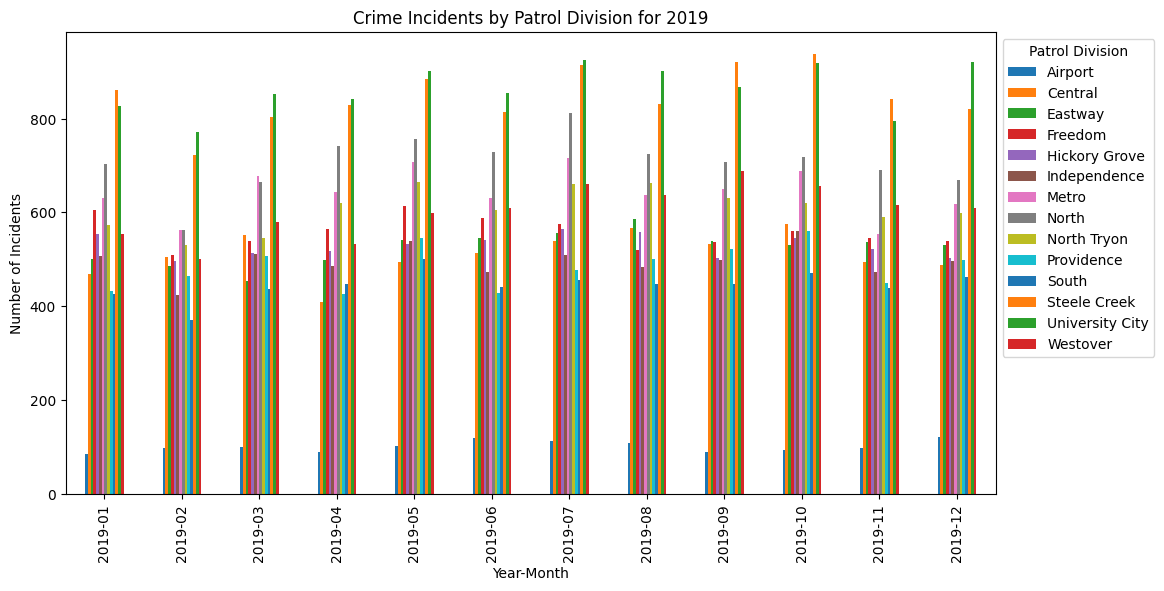

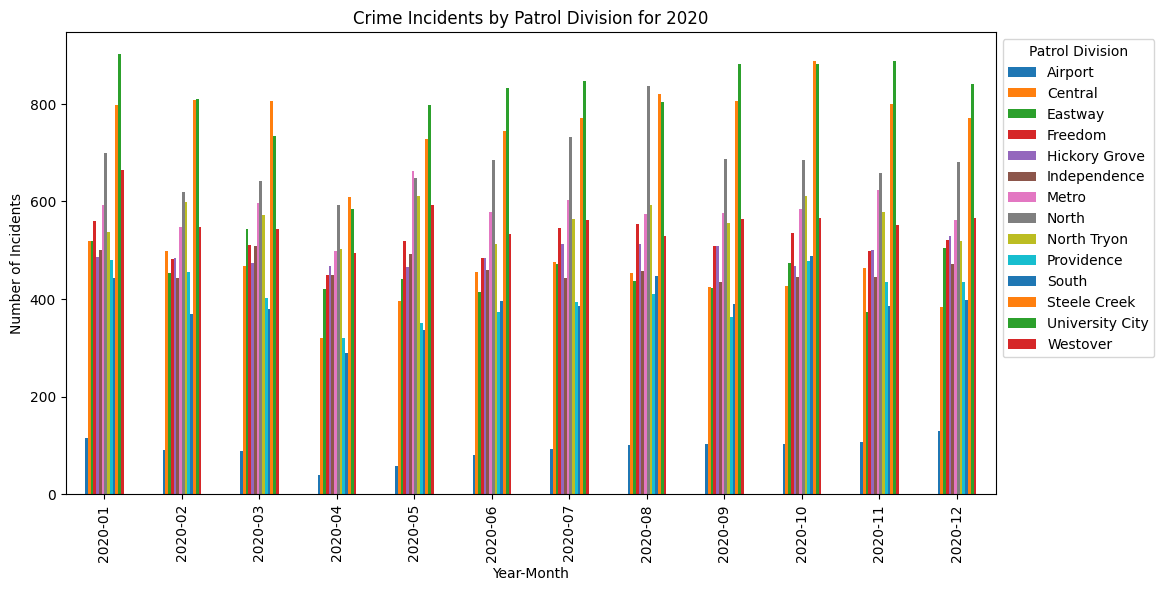

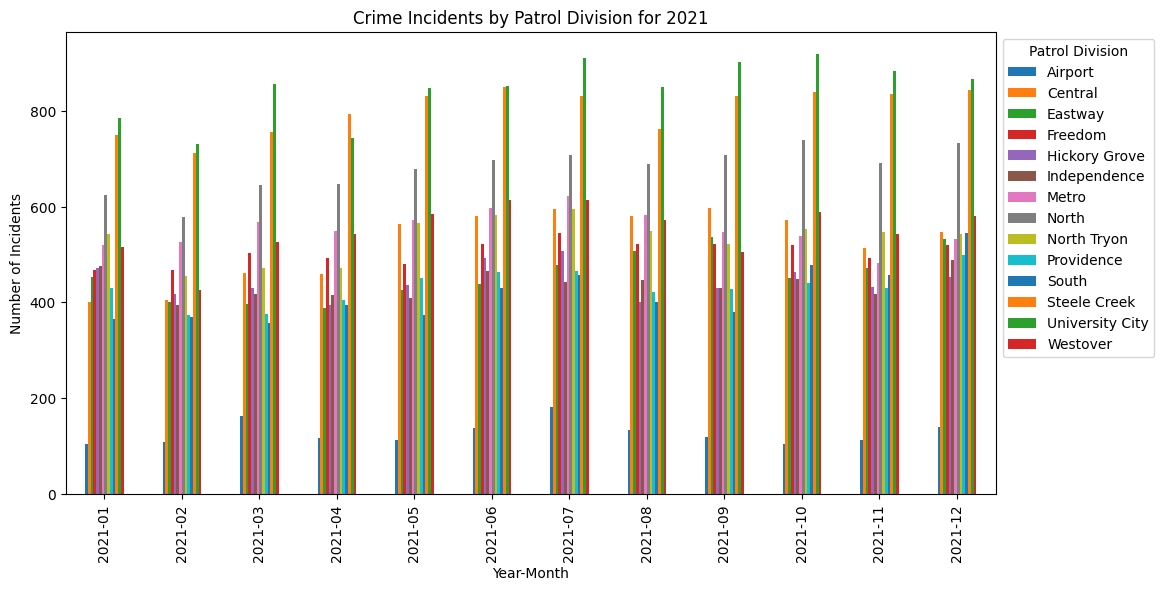

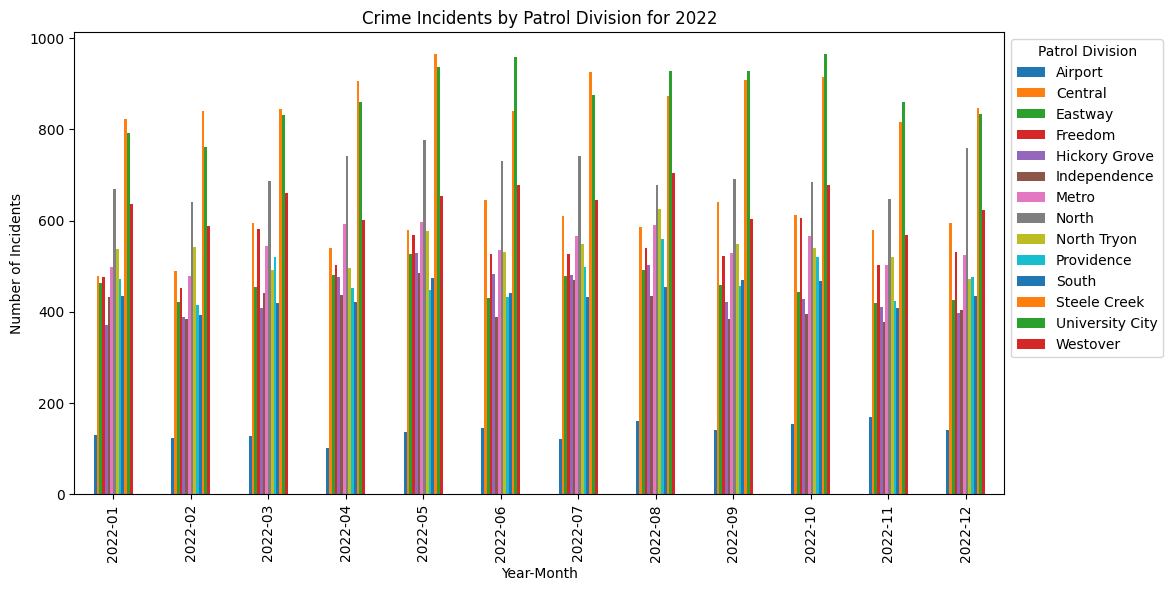

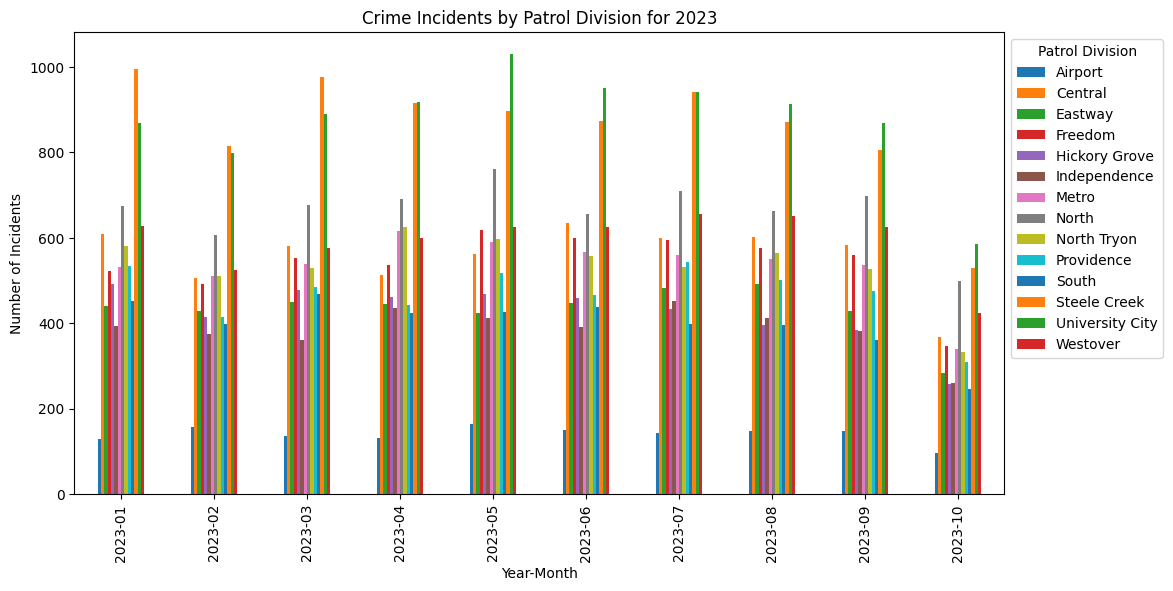

In [65]:
# iterate through the years in the index of the crimeTable DataFrame
years = crimeTable.index.year.unique()
for year in years:
    # filter the data for the specific year
    year_data = crimeTable[crimeTable.index.year == year]
    
    # create a bar chart for the current year
    ax = year_data.plot(kind='bar', stacked=False, figsize=(12, 6), title=f'Crime Incidents by Patrol Division for {year}')
    
    # customize the chart appearance (you can further customize it as needed)
    plt.xlabel('Year-Month')
    plt.ylabel('Number of Incidents')
    plt.legend(title='Patrol Division', loc='upper left', bbox_to_anchor=(1, 1))
    
    # show the chart
    plt.show()

In [13]:
# Calculate the sum of incidents for each year
yearly_sum = crimeTable.resample('Y').sum()

# Calculate the difference in incidents from year to year
yearly_difference = yearly_sum.diff()

# Display the resulting DataFrame
yearly_difference

CMPD_PATROL_DIVISION,Airport,Central,Eastway,Freedom,Hickory Grove,Independence,Metro,North,North Tryon,Providence,South,Steele Creek,University City,Westover
YearMonth,,,,,,,,,,,,,,
2019,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020,-108.0,-856.0,-833.0,-533.0,-460.0,-409.0,-716.0,-314.0,-548.0,-919.0,-635.0,-834.0,-574.0,-529.0
2021,427.0,999.0,8.0,-108.0,-555.0,-301.0,-356.0,-21.0,-353.0,291.0,299.0,289.0,343.0,-100.0
2022,111.0,671.0,17.0,279.0,-39.0,-222.0,-122.0,301.0,25.0,486.0,241.0,872.0,385.0,1028.0
2023,-243.0,-1391.0,-1173.0,-940.0,-1048.0,-1154.0,-1178.0,-1805.0,-1068.0,-980.0,-1241.0,-1887.0,-1763.0,-1704.0
